In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import random as rn
from IPython.display import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from PIL import Image

import json

%matplotlib inline

In [2]:
from tensorflow.keras.utils import to_categorical
# 파일 불러오기
X_m = np.load('/Users/minseok/Desktop/ict 공모전/ict 모델링/데이터/X_specto.npy')
X_m = np.expand_dims(X_m, axis=-1)

X_p = np.load('/Users/minseok/Desktop/ict 공모전/ict 모델링/데이터/X_PatchCraft.npy')
X_p = np.expand_dims(X_p, axis=-1)

Y = np.load('/Users/minseok/Desktop/ict 공모전/ict 모델링/데이터/Y.npy')
Y = np.expand_dims(Y, axis=-1)

Y = to_categorical(Y, num_classes=2)

(128, 250, 250, 1) (41, 250, 250, 1) (128, 2) (41, 2)


2024-07-26 21:59:32.609459: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-07-26 21:59:32.609492: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-07-26 21:59:32.609498: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-07-26 21:59:32.609538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-26 21:59:32.609568: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2024-07-26 21:59:33.610241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.4453

2024-07-26 21:59:37.816146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 5s 571ms/step - loss: 0.6948 - accuracy: 0.4453 - val_loss: 0.6936 - val_accuracy: 0.4688 - lr: 1.0000e-04
Epoch 2/50
8/8 [==============================] - 4s 531ms/step - loss: 0.6934 - accuracy: 0.5234 - val_loss: 0.6933 - val_accuracy: 0.4688 - lr: 1.0000e-04
Epoch 3/50
8/8 [==============================] - 4s 530ms/step - loss: 0.6928 - accuracy: 0.5156 - val_loss: 0.6933 - val_accuracy: 0.4688 - lr: 1.0000e-04
Epoch 4/50
8/8 [==============================] - 4s 502ms/step - loss: 0.6941 - accuracy: 0.4688 - val_loss: 0.6936 - val_accuracy: 0.4688 - lr: 1.0000e-04
Epoch 5/50
8/8 [==============================] - 4s 499ms/step - loss: 0.6936 - accuracy: 0.4531 - val_loss: 0.6934 - val_accuracy: 0.4688 - lr: 1.0000e-04
Epoch 6/50
8/8 [==============================] - 4s 501ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4688 - lr: 1.0000e-04
Epoch 7/50
8/8 [==============================] - 4s 531ms/step - los

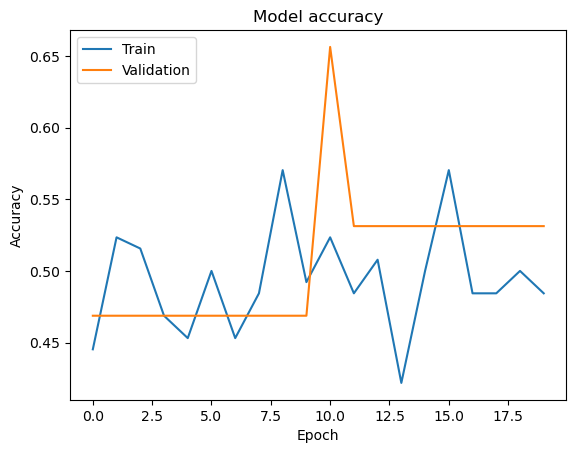

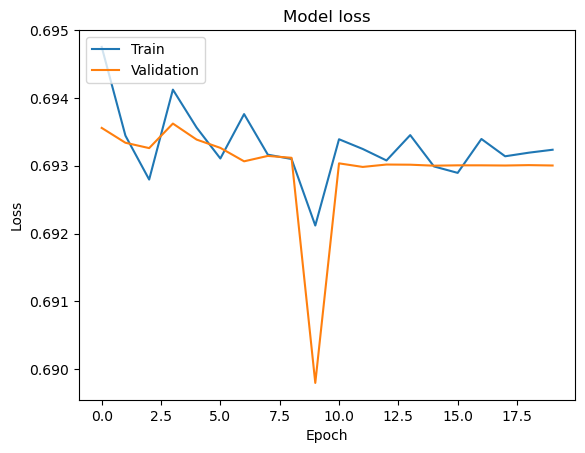

3/3 [==============================] - 0s 118ms/step - loss: 0.6886 - accuracy: 0.5122
Test accuracy: 0.51, Test loss: 0.69
2/3 [===================>..........] - ETA: 0s

2024-07-26 22:00:56.830653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 120ms/step


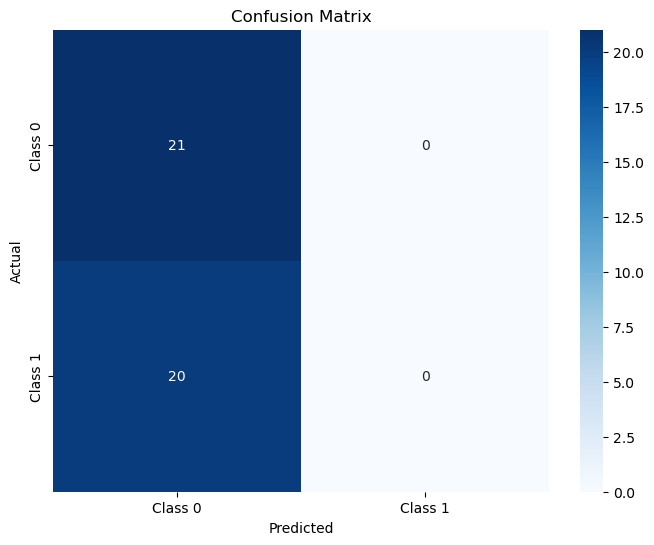

              precision    recall  f1-score   support

     Class 0       0.51      1.00      0.68        21
     Class 1       0.00      0.00      0.00        20

    accuracy                           0.51        41
   macro avg       0.26      0.50      0.34        41
weighted avg       0.26      0.51      0.35        41



/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers.legacy import Adam  # 레거시 최적화기 사용
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분할
X_m_train, X_m_test, Y_m_train, Y_m_test = train_test_split(X_m, Y, test_size=0.2, stratify=Y)
X_m_train, X_m_val, Y_m_train, Y_m_val = train_test_split(X_m_train, Y_m_train, test_size=0.2, stratify=Y_m_train)

print(X_m_train.shape, X_m_test.shape, Y_m_train.shape, Y_m_test.shape)

# 데이터 제너레이터 준비
train_generator = ImageDataGenerator(rescale=1/255.0)
valid_generator = ImageDataGenerator(rescale=1/255.0)
flow_tr_gen = train_generator.flow(X_m_train, Y_m_train, batch_size=16, shuffle=True)
flow_val_gen = valid_generator.flow(X_m_val, Y_m_val, batch_size=16, shuffle=False)

# VGG16 모델 설정
IMAGE_SIZE = 250

base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), weights=None, include_top=False)

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Assuming 2 classes for the output

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 콜백 설정
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# 모델 학습
history = model.fit(
    flow_tr_gen,
    steps_per_epoch=len(X_m_train) // 16,
    validation_data=flow_val_gen,
    validation_steps=len(X_m_val) // 16,
    epochs=50,
    callbacks=[reduce_lr, early_stopping, checkpoint]
)

# 학습 결과 출력
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 테스트 데이터 평가
test_generator = ImageDataGenerator(rescale=1/255.0)
flow_test_gen = test_generator.flow(X_m_test, Y_m_test, batch_size=16, shuffle=False)

test_loss, test_acc = model.evaluate(flow_test_gen)
print(f'Test accuracy: {test_acc:.2f}, Test loss: {test_loss:.2f}')

# 예측값 생성
Y_pred = model.predict(flow_test_gen)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_m_test, axis=1)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 분류 보고서 출력
class_report = classification_report(Y_true, Y_pred_classes, target_names=['Class 0', 'Class 1'])
print(class_report)
